In [1]:
%matplotlib inline
# This command is to plot images in the notebook

In [2]:
from __future__ import print_function
from fenics import *
import time
import matplotlib.pyplot as plt

In [3]:
T = 1.0       # final time
num_steps = 40     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
#nx = ny = 30
#mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
mesh = Mesh("rocke2.xml")
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
V = FunctionSpace(mesh, P1)

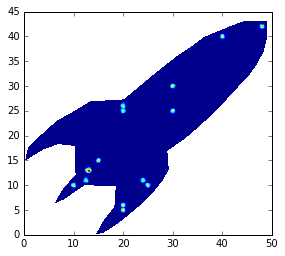

In [4]:
# Define initial value
u_0 = Expression('2*exp(-a*pow(x[0]-13.0, 2) - a*pow(x[1]-13.0, 2))+exp(-a*pow(x[0]-10.0, 2) - a*pow(x[1]-10.0, 2))+exp(-a*pow(x[0]-48.0, 2) - a*pow(x[1]-42.0, 2))+exp(-a*pow(x[0]-15.0, 2) - a*pow(x[1]-15.0, 2))+exp(-a*pow(x[0]-25.0, 2) - a*pow(x[1]-10.0, 2))+exp(-a*pow(x[0]-40.0, 2) - a*pow(x[1]-40.0, 2))+exp(-a*pow(x[0]-20.0, 2) - a*pow(x[1]-6.0, 2))+exp(-a*pow(x[0]-20.0, 2) - a*pow(x[1]-5.0, 2))+exp(-a*pow(x[0]-12.5, 2) - a*pow(x[1]-11.0, 2))+exp(-a*pow(x[0]-24.0, 2) - a*pow(x[1]-11.0, 2))+exp(-a*pow(x[0]-20.0, 2) - a*pow(x[1]-25.0, 2))+exp(-a*pow(x[0]-20.0, 2) - a*pow(x[1]-26.0, 2))+exp(-a*pow(x[0]-30.0, 2) - a*pow(x[1]-25.0, 2))+exp(-a*pow(x[0]-30.0, 2) - a*pow(x[1]-30.0, 2))',
                 degree=2, a=10)
#u_0 = Expression(('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))+exp(-a*pow(x[0]-1.0, 2) - a*pow(x[1]-1.0, 2))'),
#                 degree=2, a=5)
u_n = interpolate(u_0, V)
n = FacetNormal(mesh)
x_0_e = Expression('x[0]',
                 degree=2)
x_1_e = Expression('x[1]',
                 degree=2)
x_0 = interpolate(x_0_e, V)
x_1 = interpolate(x_1_e, V)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
plot(u_n,scalarbar = True)
plt.show()

In [5]:
a =  u*v*dx + dt*dot(grad(u), grad(v))*dx
L = u_n*v*dx
# Create VTK file for saving solution
vtkfile = File('heat_gaussian_neumman/solution.pvd')

In [6]:
# Time-stepping
u = Function(V)
t = 0
integral_ini_1 = assemble(u_n*dx)
integral_ini_2 = assemble(x_0*u_n*dx)
integral_ini_3 = assemble(x_1*u_n*dx)
print("mass: ",integral_ini_1)
print("mean x: ",integral_ini_2)
print("mean y: ",integral_ini_3)

mass:  4.66436056706846
mean x:  106.05115311319473
mean y:  88.03623561773293


iteration: 0


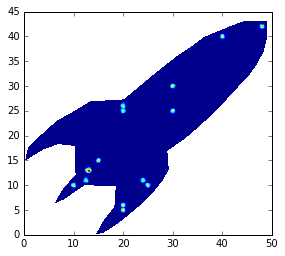

mass:  4.664360567068471
mean x:  106.05105309424911
mean y:  88.03633016345903
iteration:  1


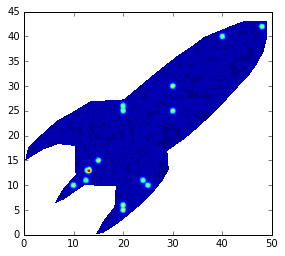

mass:  4.664360567068453
mean x:  106.05073844575453
mean y:  88.03645679343127
iteration:  2


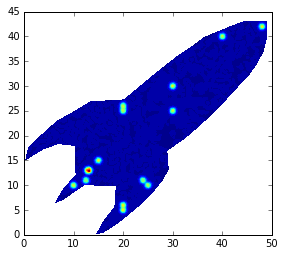

mass:  4.66436056706848
mean x:  106.05013628953247
mean y:  88.0363381495602
iteration:  3


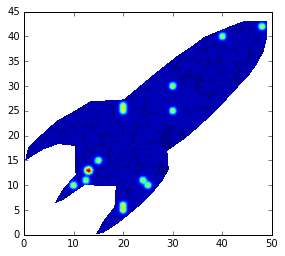

mass:  4.664360567068463
mean x:  106.0492222813219
mean y:  88.03583720383726
iteration:  4


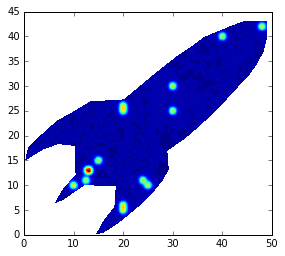

mass:  4.664360567068452
mean x:  106.04800893142284
mean y:  88.03493152499036
iteration:  5


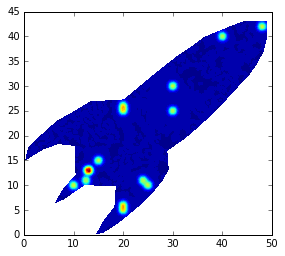

mass:  4.664360567068456
mean x:  106.04652991497417
mean y:  88.03365527771284
iteration:  6


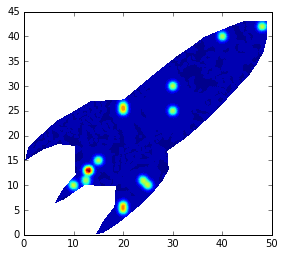

mass:  4.6643605670684725
mean x:  106.04482813400703
mean y:  88.03206268269075
iteration:  7


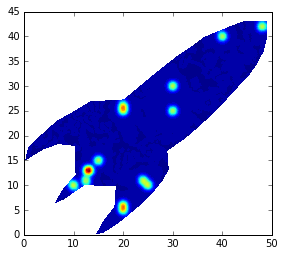

mass:  4.66436056706846
mean x:  106.04294831746027
mean y:  88.03021027350462
iteration:  8


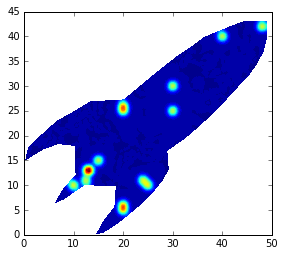

mass:  4.6643605670684725
mean x:  106.04093296870379
mean y:  88.02814973414662
iteration:  9


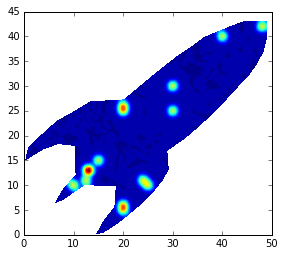

mass:  4.664360567068447
mean x:  106.03882042016801
mean y:  88.02592579674538
iteration:  10


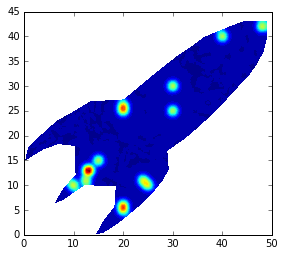

mass:  4.664360567068446
mean x:  106.03664411590701
mean y:  88.02357627778545
iteration:  11


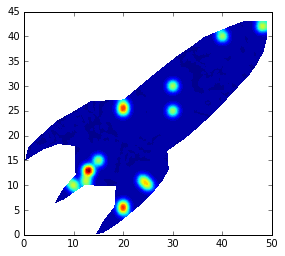

mass:  4.664360567068443
mean x:  106.03443257124168
mean y:  88.02113287005737
iteration:  12


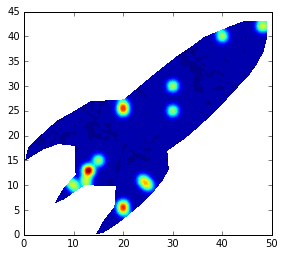

mass:  4.664360567068468
mean x:  106.03220968186301
mean y:  88.01862209245255
iteration:  13


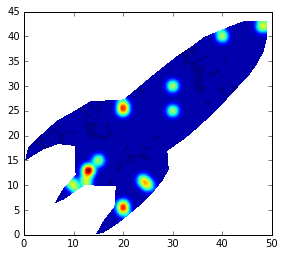

mass:  4.664360567068444
mean x:  106.02999519270494
mean y:  88.01606616899197
iteration:  14


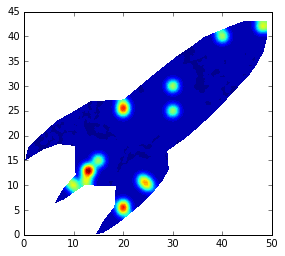

mass:  4.664360567068456
mean x:  106.02780521925787
mean y:  88.01348377053284
iteration:  15


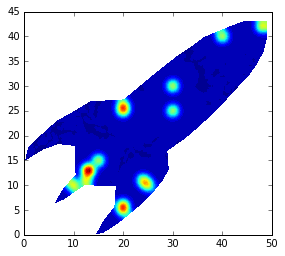

mass:  4.6643605670684565
mean x:  106.02565276255729
mean y:  88.01089061755123
iteration:  16


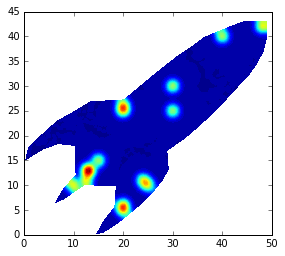

mass:  4.664360567068433
mean x:  106.02354818764475
mean y:  88.00829996410876
iteration:  17


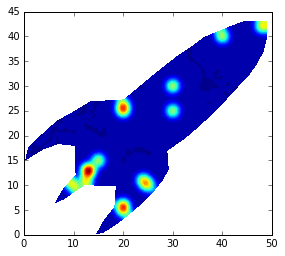

mass:  4.66436056706846
mean x:  106.02149965191941
mean y:  88.00572298693784
iteration:  18


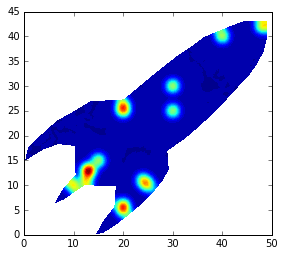

mass:  4.664360567068456
mean x:  106.01951347935983
mean y:  88.00316910098131
iteration:  19


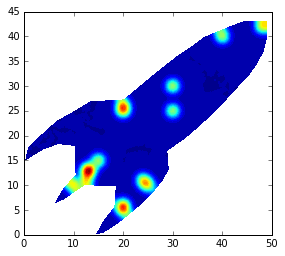

mass:  4.66436056706846
mean x:  106.01759448188866
mean y:  88.00064621835409
iteration:  20


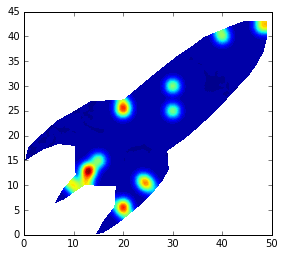

mass:  4.664360567068459
mean x:  106.01574623187193
mean y:  87.99816096360851
iteration:  21


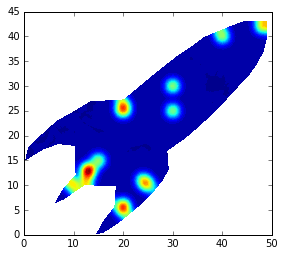

mass:  4.664360567068445
mean x:  106.01397129098359
mean y:  87.99571885485003
iteration:  22


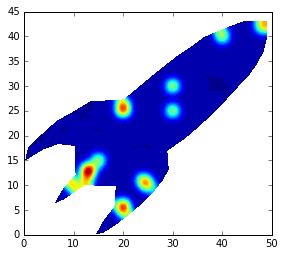

mass:  4.664360567068455
mean x:  106.01227140096537
mean y:  87.99332445766449
iteration:  23


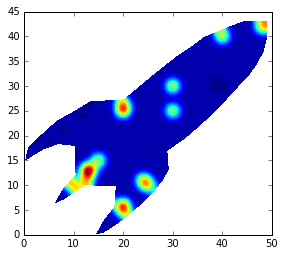

mass:  4.664360567068488
mean x:  106.01064764167896
mean y:  87.99098151703005
iteration:  24


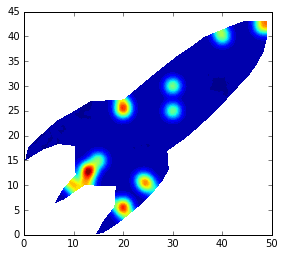

mass:  4.664360567068439
mean x:  106.00910056139709
mean y:  87.98869307106328
iteration:  25


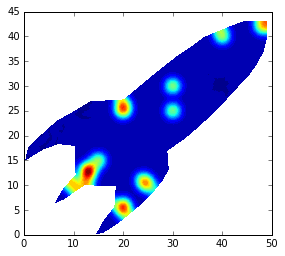

mass:  4.664360567068445
mean x:  106.00763028375786
mean y:  87.98646154950619
iteration:  26


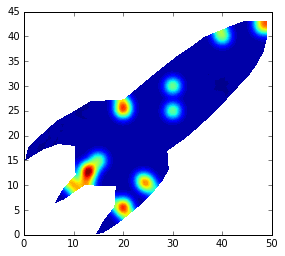

mass:  4.664360567068437
mean x:  106.00623659524958
mean y:  87.9842888592588
iteration:  27


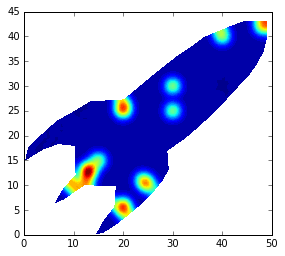

mass:  4.664360567068475
mean x:  106.00491901652461
mean y:  87.98217645875478
iteration:  28


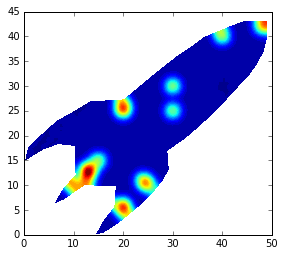

mass:  4.664360567068486
mean x:  106.00367686037039
mean y:  87.98012542268377
iteration:  29


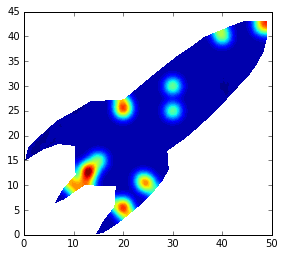

mass:  4.664360567068467
mean x:  106.0025092786841
mean y:  87.978136498301
iteration:  30


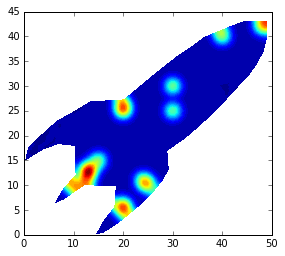

mass:  4.664360567068465
mean x:  106.00141530045548
mean y:  87.97621015437716
iteration:  31


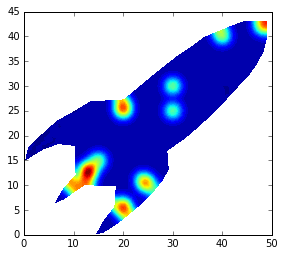

mass:  4.66436056706845
mean x:  106.00039386236398
mean y:  87.97434662371266
iteration:  32


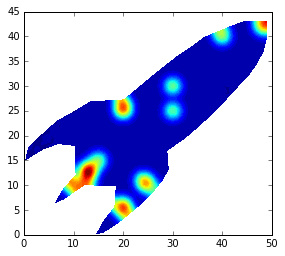

mass:  4.664360567068444
mean x:  105.99944383338325
mean y:  87.97254593999942
iteration:  33


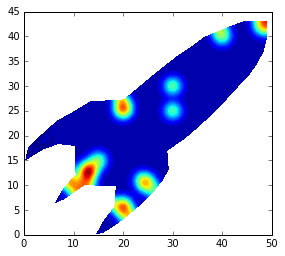

mass:  4.664360567068454
mean x:  105.99856403448459
mean y:  87.9708079697383
iteration:  34


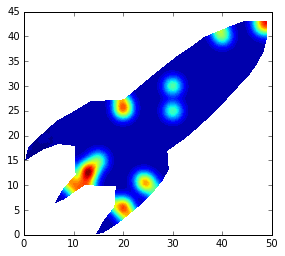

mass:  4.664360567068456
mean x:  105.99775325437432
mean y:  87.96913243981709
iteration:  35


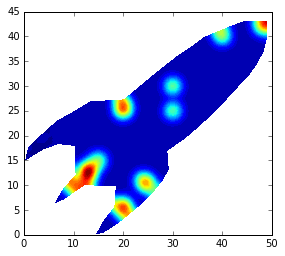

mass:  4.66436056706844
mean x:  105.99701026201383
mean y:  87.96751896130145
iteration:  36


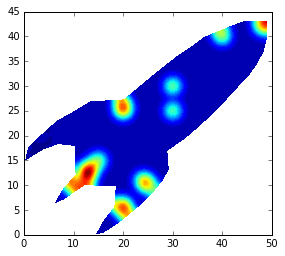

mass:  4.664360567068464
mean x:  105.99633381653024
mean y:  87.96596704990323
iteration:  37


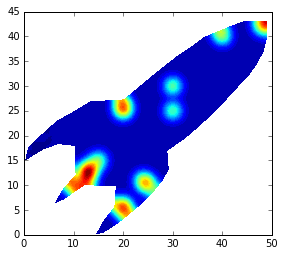

mass:  4.664360567068454
mean x:  105.99572267503876
mean y:  87.964476143563
iteration:  38


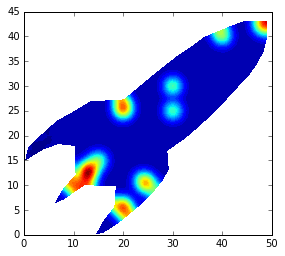

mass:  4.664360567068451
mean x:  105.99517559875875
mean y:  87.96304561750642
iteration:  39


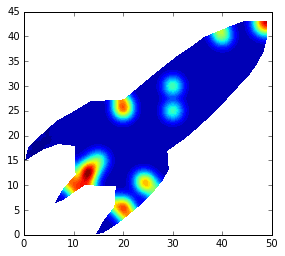

mass:  4.6643605670684725
mean x:  105.99469135778138
mean y:  87.96167479711298
iteration:  40


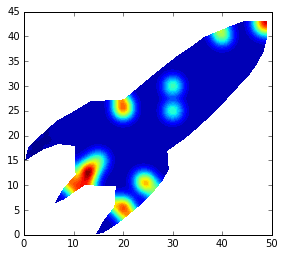

In [7]:
#Solution
print("iteration: 0")
plot(u_n,scalarbar = True)
plt.show()
meansx = [0.0]
meansy = [0.0]
masses = [0.0]
time = [0.0]
for n in range(num_steps):

    # Update current time
    t += dt
    time.append(t)
    # Compute solution
    solve(a == L, u)
    integral_1 = assemble(u*dx)
    integral_2 = assemble(x_0*u*dx)
    integral_3 = assemble(x_1*u*dx)
    print("mass: ",integral_1)
    masses.append(abs(integral_1-integral_ini_1))
    print("mean x: ",integral_2)
    meansx.append(abs(integral_2-integral_ini_2))
    print("mean y: ",integral_3)
    meansy.append(abs(integral_3-integral_ini_3))
    print("iteration: ",n+1)
    # Save to file and plot solution
    vtkfile << (u, t)
    plot(u,scalarbar = True)
    plt.show()
    # Update previous solution
    u_n.assign(u)

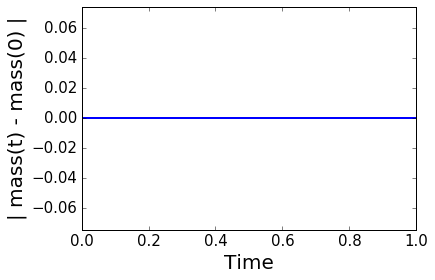

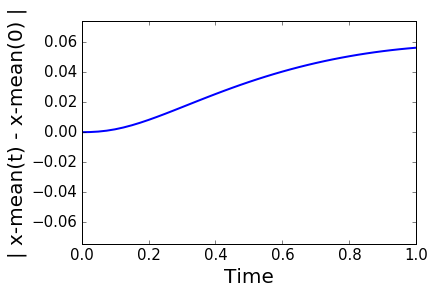

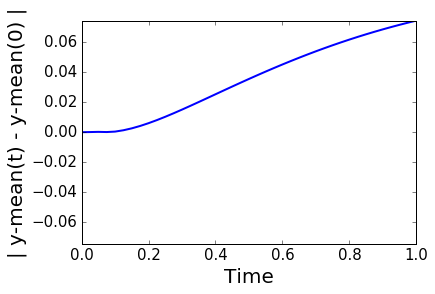

In [8]:
plt.axes(xlim=(0, T),ylim=(-max(max(meansx),max(meansy)), max(max(meansx),max(meansy))))
plt.ylabel('| mass(t) - mass(0) |',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#plt.title("Mass conservation Neumann B.C.",fontsize=20)
plt.plot(time,masses,color='b', linewidth=2.0) # if mass is conserved the plot should be zero
plt.show()

plt.axes(xlim=(0, T),ylim=(-max(max(meansx),max(meansy)), max(max(meansx),max(meansy))))
plt.ylabel('| x-mean(t) - x-mean(0) |',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#plt.title("Mean conservation Neumann B.C.",fontsize=20)
plt.plot(time,meansx, color='b', linewidth=2.0) # if mean is conserved the plot should be zero
plt.show()

plt.axes(xlim=(0, T),ylim=(-max(max(meansx),max(meansy)), max(max(meansx),max(meansy))))
plt.ylabel('| y-mean(t) - y-mean(0) |',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#plt.title("Mean conservation Neumann B.C.",fontsize=20)
plt.plot(time,meansy, color='b', linewidth=2.0) # if mean is conserved the plot should be zero
plt.show()